In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
L = 256
L1 = L - 1
img_in = plt.imread('dark_squares.png')
img0 = np.floor(img_in[:,:,1] * L1).astype(int)
# img0 = np.floor(np.sum(img_in[:,:,:3], axis=2)/3 * 256).astype(int)
M, N = img0.shape

In [7]:
def get_histogram(img):
    histogram = np.zeros(L, dtype=int)
    for val in img.flatten():
        histogram[val] += 1
    return histogram

In [3]:
def get_neighbourhood(img, i, j, r):
    i1, j1 = max(i-r, 0), max(j-r, 0)
    i2, j2 = min(i+r+1, M), min(j+r+1, N)
    return img[i1:i2, j1:j2]

In [4]:
def get_local_histogram(img, i, j, r):
    histogram = np.zeros(L, dtype=int)
    for val in get_neighbourhood(img, i, j, r).flatten():
        histogram[val] += 1
    return histogram

In [5]:
def plot_img_hist(img):
    _, axarr = plt.subplots(1, 2, figsize=(8,4))
    axarr[0].imshow(img, cmap='grey', vmin=0, vmax=L)
    axarr[1].bar(np.arange(0, L, dtype=int), get_histogram(img))
    # axarr[1].hist(img.flatten(), np.arange(0, 256))

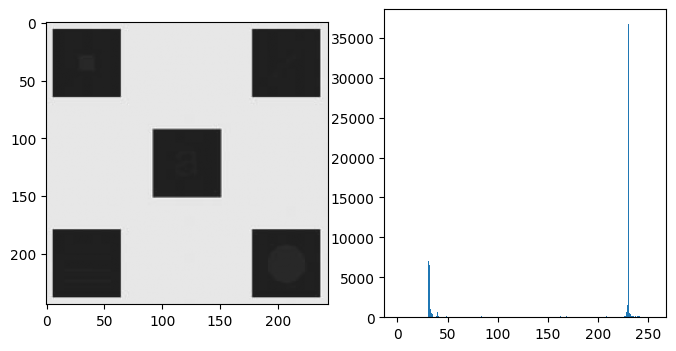

In [8]:
plot_img_hist(img0)

In [9]:
mg = np.mean(img0)
sg = np.std(img0)
k0, k1 = 0.19, 0.21
k2, k3 = 0, 0.1
C = 5

In [11]:
rad = 1
img2 = np.zeros((M, N), dtype=int)
stat = np.zeros((M, N, 2), dtype=int)
for x in range(M):
    for y in range(N):
        neigh = get_neighbourhood(img0, x, y, rad)
        stat[x,y,:] = np.mean(neigh), np.std(neigh)
        if k0*mg <= np.mean(neigh) <= k1*mg and \
            k2*sg <= np.std(neigh) <= k3*sg:
            img2[x, y] = C * img0[x,y]
        else:
            img2[x, y] = img0[x,y]

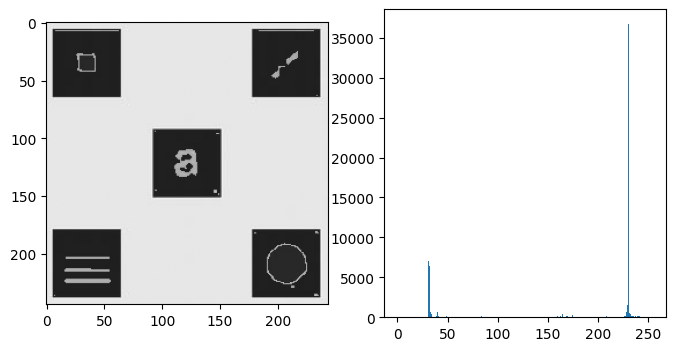

In [12]:
plot_img_hist(img2)